In [1]:
!pip install tensorflow pandas scikit-learn

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data
file_path = r'C:\Users\TanMeh\Desktop\group project\frequency distributions\to code.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Define the input and output columns
input_columns = ['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR', 'D_DESTYCOOR', 'D_HREDE']
output_columns = ['P_SEXE-2', 'P_GRAGE-2', 'D_ORIXCOOR-2', 'D_ORIYCOOR-2', 'D_DESTXCOOR-2', 'D_DESTYCOOR-2', 'D_HREDE-2']

# Separate inputs (X) and outputs (y)
X = data[input_columns]
y = data[output_columns]

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the data for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Build the model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Define the input shape here
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(output_columns))  # Matches the number of target columns
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [9]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)

Epoch 1/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
305/305 ━━

In [10]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)

Epoch 1/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
305/305 ━━

In [11]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Create DataFrames for comparison
predicted_df = pd.DataFrame(y_pred, columns=output_columns)
actual_df = pd.DataFrame(y_test.values, columns=output_columns)

# Display comparison
comparison_df = pd.concat([predicted_df, actual_df], axis=1, keys=['Predicted', 'Actual'])
print(comparison_df.head())


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
  Predicted                                                                  \
   P_SEXE-2 P_GRAGE-2 D_ORIXCOOR-2 D_ORIYCOOR-2 D_DESTXCOOR-2 D_DESTYCOOR-2   
0  1.675921  10.13935          NaN          NaN           NaN           NaN   
1  1.675921  10.13935          NaN          NaN           NaN           NaN   
2  1.675921  10.13935          NaN          NaN           NaN           NaN   
3  1.675921  10.13935          NaN          NaN           NaN           NaN   
4  1.675921  10.13935          NaN          NaN           NaN           NaN   

              Actual                                                    \
  D_HREDE-2 P_SEXE-2 P_GRAGE-2 D_ORIXCOOR-2 D_ORIYCOOR-2 D_DESTXCOOR-2   
0       NaN      1.0       9.0          NaN          NaN           NaN   
1       NaN      1.0      10.0          NaN          NaN           NaN   
2       NaN      1.0      13.0          NaN          NaN           NaN   
3       NaN      2.0      16.0       

In [13]:
# Save the model in the recommended format
model.save('data_transformation_model.keras')

In [14]:
import matplotlib.pyplot as plt

In [ ]:
#Visualize Training and Validation Loss

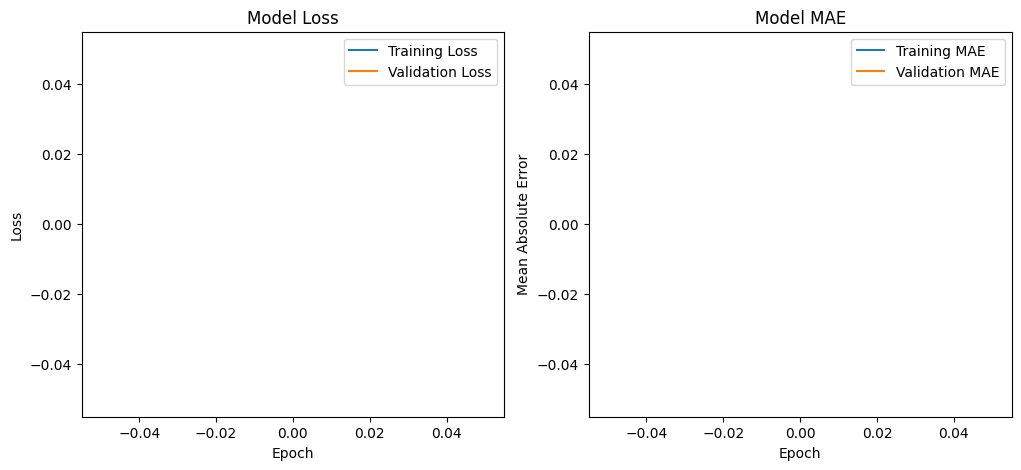

In [15]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [ ]:
#Visualize Predicted vs. Actual Values

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


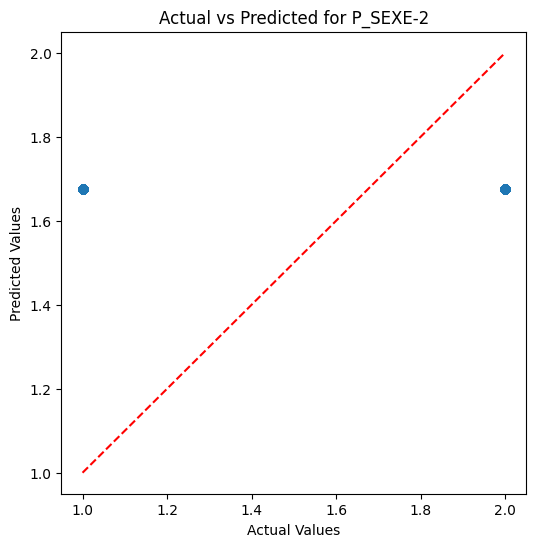

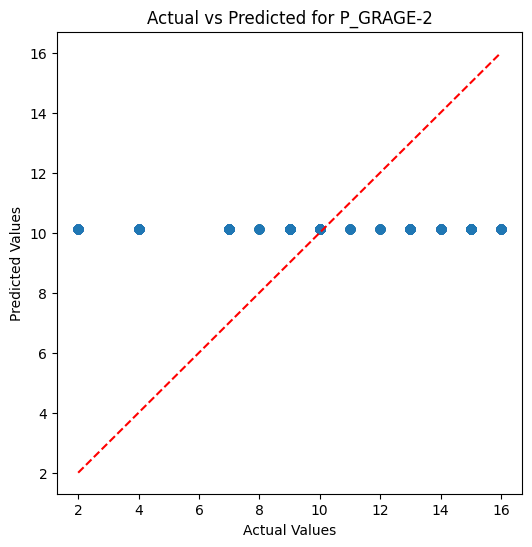

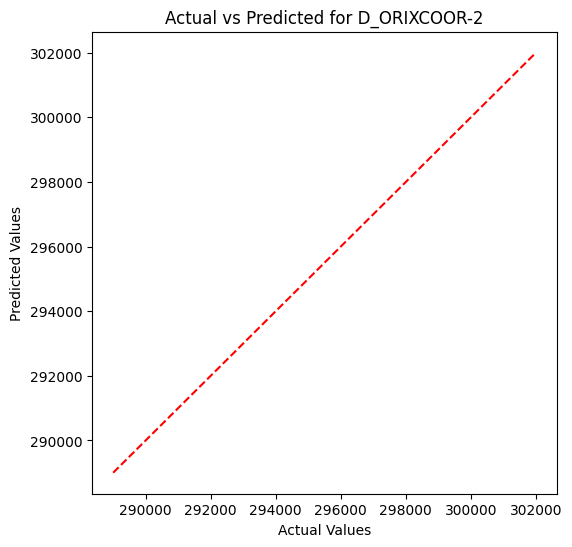

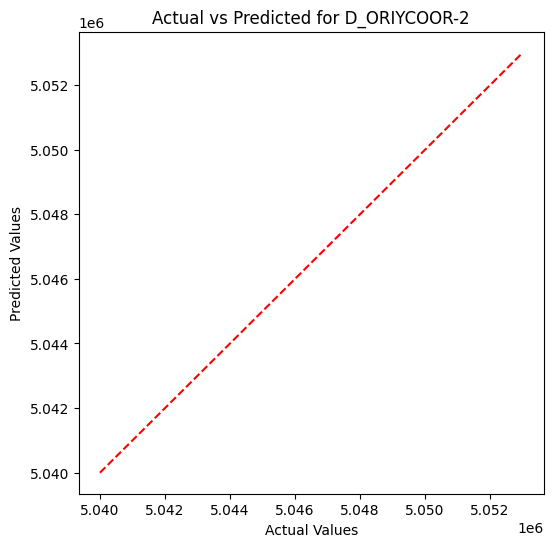

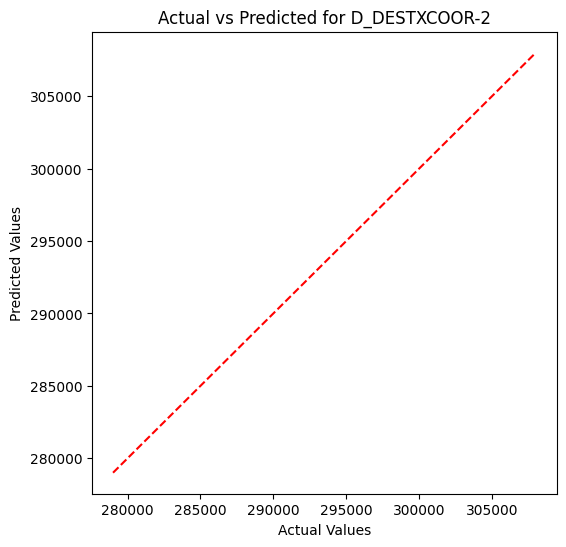

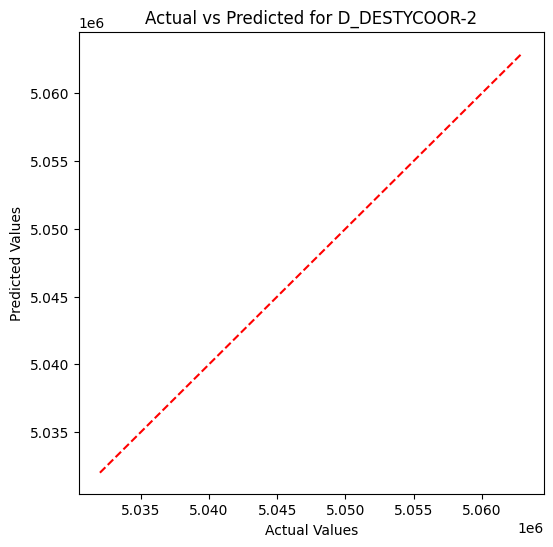

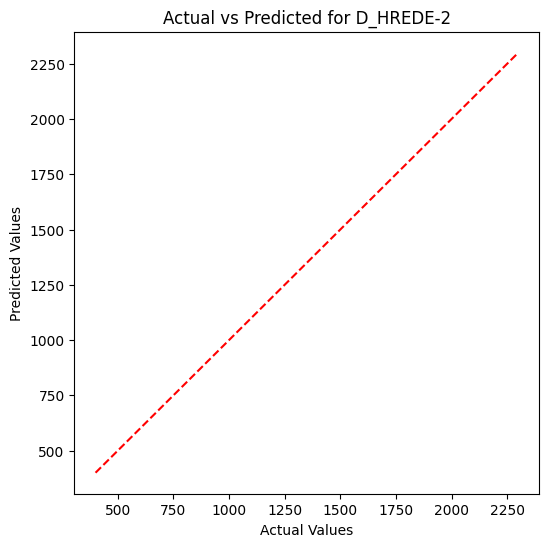

In [16]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Convert to DataFrame for easier comparison
predicted_df = pd.DataFrame(y_pred, columns=output_columns)
actual_df = pd.DataFrame(y_test.values, columns=output_columns)

# Plot each output column
for column in output_columns:
    plt.figure(figsize=(6, 6))
    plt.scatter(actual_df[column], predicted_df[column], alpha=0.5)
    plt.plot([actual_df[column].min(), actual_df[column].max()],
             [actual_df[column].min(), actual_df[column].max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted for {column}')
    plt.show()

In [ ]:
#Visualize Prediction Errors (Residuals)

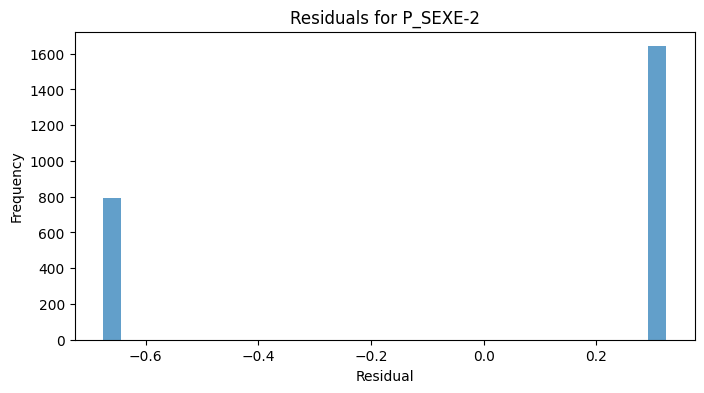

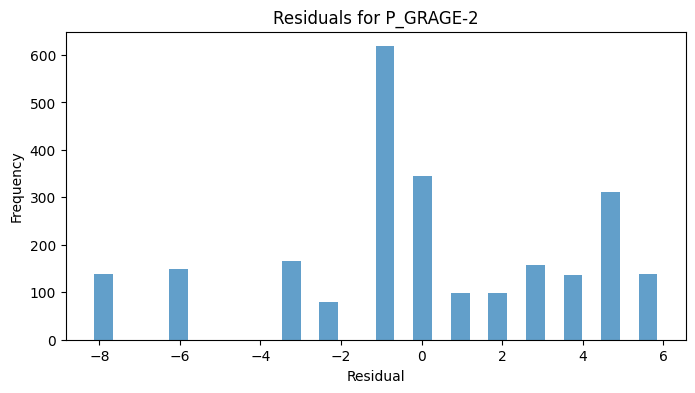

No valid residuals to plot for D_ORIXCOOR-2
No valid residuals to plot for D_ORIYCOOR-2
No valid residuals to plot for D_DESTXCOOR-2
No valid residuals to plot for D_DESTYCOOR-2
No valid residuals to plot for D_HREDE-2


<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = actual_df - predicted_df

# Plot residuals for each output feature
for column in output_columns:
    plt.figure(figsize=(8, 4))
    
    # Drop NaN values in residuals for the current column
    residuals_column = residuals[column].dropna()
    
    # Plot histogram if there are non-NaN values
    if not residuals_column.empty:
        plt.hist(residuals_column, bins=30, alpha=0.7)
        plt.title(f'Residuals for {column}')
        plt.xlabel('Residual')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"No valid residuals to plot for {column}")


In [19]:
# Check for NaN values in actual and predicted dataframes
print("NaN count in actual_df:")
print(actual_df.isna().sum())
print("\nNaN count in predicted_df:")
print(predicted_df.isna().sum())


NaN count in actual_df:
P_SEXE-2            0
P_GRAGE-2           0
D_ORIXCOOR-2     2322
D_ORIYCOOR-2     2340
D_DESTXCOOR-2    2322
D_DESTYCOOR-2    2346
D_HREDE-2        2366
dtype: int64

NaN count in predicted_df:
P_SEXE-2            0
P_GRAGE-2           0
D_ORIXCOOR-2     2435
D_ORIYCOOR-2     2435
D_DESTXCOOR-2    2435
D_DESTYCOOR-2    2435
D_HREDE-2        2435
dtype: int64


In [20]:
actual_df = actual_df.fillna(0)
predicted_df = predicted_df.fillna(0)


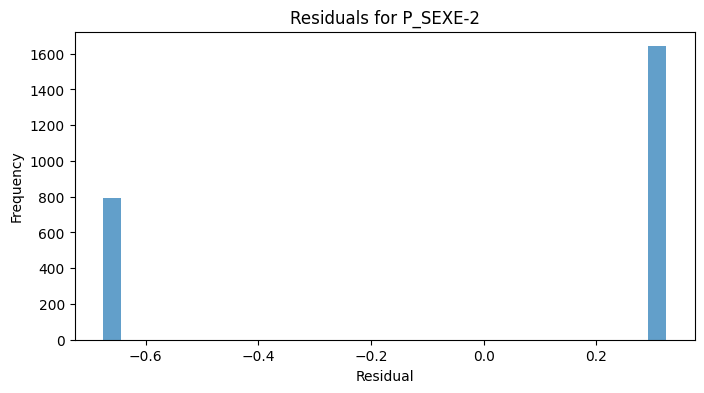

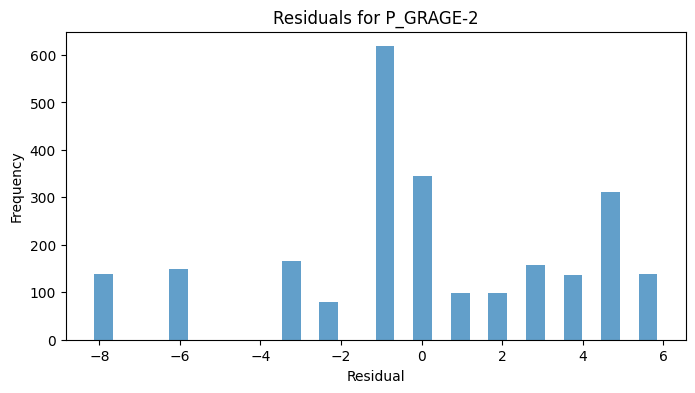

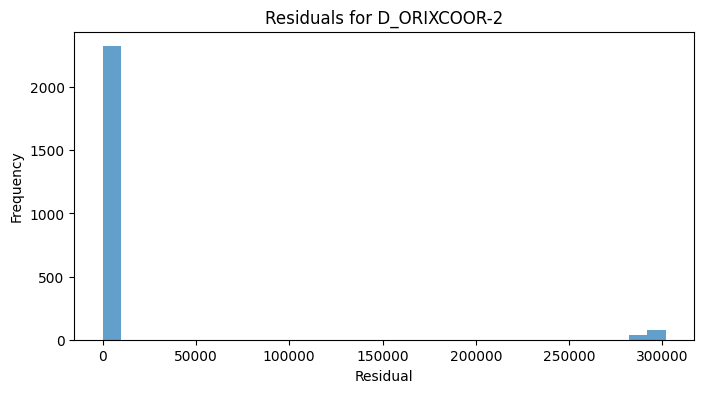

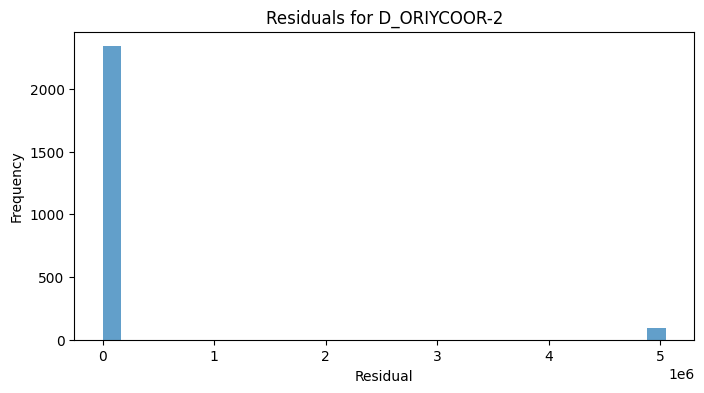

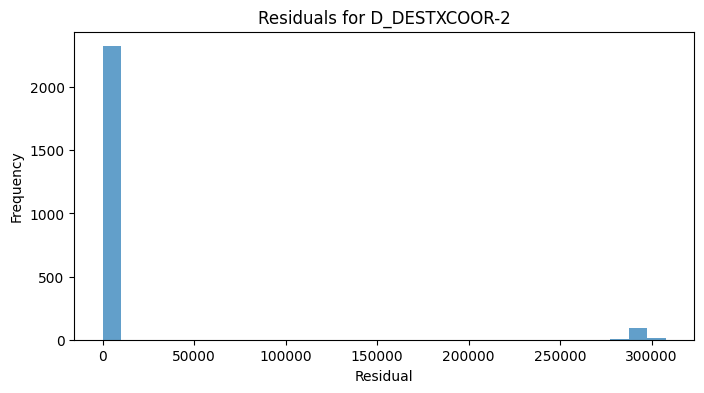

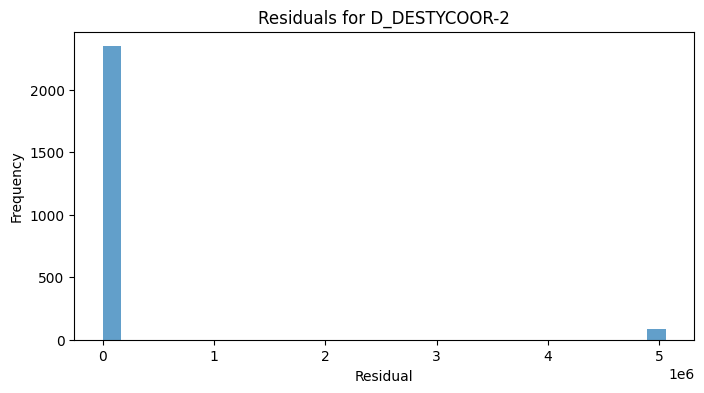

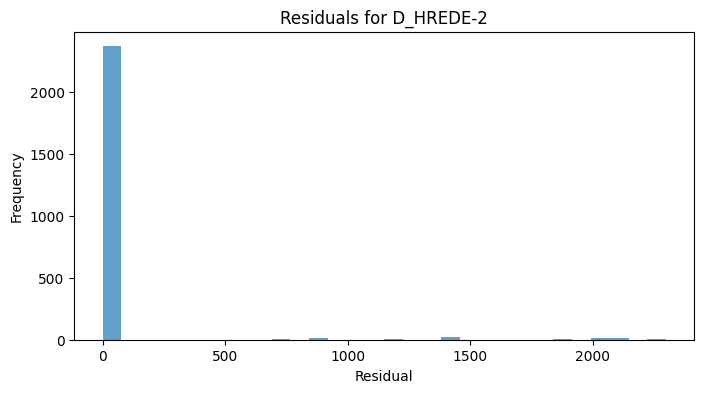

In [21]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = actual_df - predicted_df

# Plot residuals for each output feature
for column in output_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(residuals[column], bins=30, alpha=0.7)
    plt.title(f'Residuals for {column}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.show()


In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Convert predictions and actual values to DataFrames
predicted_df = pd.DataFrame(y_pred, columns=[f'Predicted_{col}' for col in output_columns])
actual_df = pd.DataFrame(y_test.values, columns=[f'Actual_{col}' for col in output_columns])

# Combine actual and predicted values
results_df = pd.concat([actual_df, predicted_df], axis=1)

# Export combined results to CSV
results_df.to_csv('model_predictions.csv', index=False)

print("Predictions have been saved to 'model_predictions.csv'")


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
Predictions have been saved to 'model_predictions.csv'


In [23]:
# Scale the entire original input dataset
X_scaled = scaler.transform(data[input_columns])

# Generate predictions for the entire dataset
generated_data = model.predict(X_scaled)

# Convert generated data to a DataFrame with appropriate column names
generated_df = pd.DataFrame(generated_data, columns=['P_SEXE-2', 'P_GRAGE-2', 'D_ORIXCOOR-2', 'D_ORIYCOOR-2', 
                                                     'D_DESTXCOOR-2', 'D_DESTYCOOR-2', 'D_HREDE-2'])

# Combine with the original input data (optional)
final_df = pd.concat([data[input_columns].reset_index(drop=True), generated_df], axis=1)

# Export combined data to CSV
final_df.to_csv('generated_data.csv', index=False)

print("Generated data has been saved to 'generated_data.csv'")


381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
Generated data has been saved to 'generated_data.csv'
